## Retriever And Chain With Langchain

In [1]:
import os
from dotenv import load_dotenv
load_dotenv("/Users/dianamarin/Documents/Git_Tutorials/Langchain/chatbot/.env")  # Ensure this is before `os.getenv` calls

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")

Python-dotenv could not parse statement starting at line 1


Python-dotenv could not parse statement starting at line 5


In [2]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("attention.pdf")
docs = loader.load()
docs

/Users/dianamarin/Documents/Git_Tutorials/Langchain/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[Document(metadata={'source': 'attention.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Tran

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
text_splitter.split_documents(docs)[:5]

[Document(metadata={'source': 'attention.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Tran

In [4]:
documents=text_splitter.split_documents(docs)
documents

[Document(metadata={'source': 'attention.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Tran

In [5]:
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS # vector store deeloper by meta

db=FAISS.from_documents(documents[:30],OpenAIEmbeddings())

/var/folders/3p/7pgwqkq11nj047kp5gq11lnc0000gn/T/ipykernel_3745/1762194262.py:5: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  db=FAISS.from_documents(documents[:30],OpenAIEmbeddings())


In [7]:
db

### Query directly taking the questiona and measurig similarity on database

In [8]:
query="An attention function can be described as mapping a query "
result=db.similarity_search(query)
result[0].page_content

'Decoder: The decoder is also composed of a stack of N = 6identical layers. In addition to the two\nsub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head\nattention over the output of the encoder stack. Similar to the encoder, we employ residual connections\naround each of the sub-layers, followed by layer normalization. We also modify the self-attention\nsub-layer in the decoder stack to prevent positions from attending to subsequent positions. This\nmasking, combined with fact that the output embeddings are offset by one position, ensures that the\npredictions for position i can depend only on the known outputs at positions less than i.\n3.2 Attention\nAn attention function can be described as mapping a query and a set of key-value pairs to an output,\nwhere the query, keys, values, and output are all vectors. The output is computed as a weighted sum\n3'

## Combine prompt with chains and retriever to get a response

### Pipelines of chain + retriever
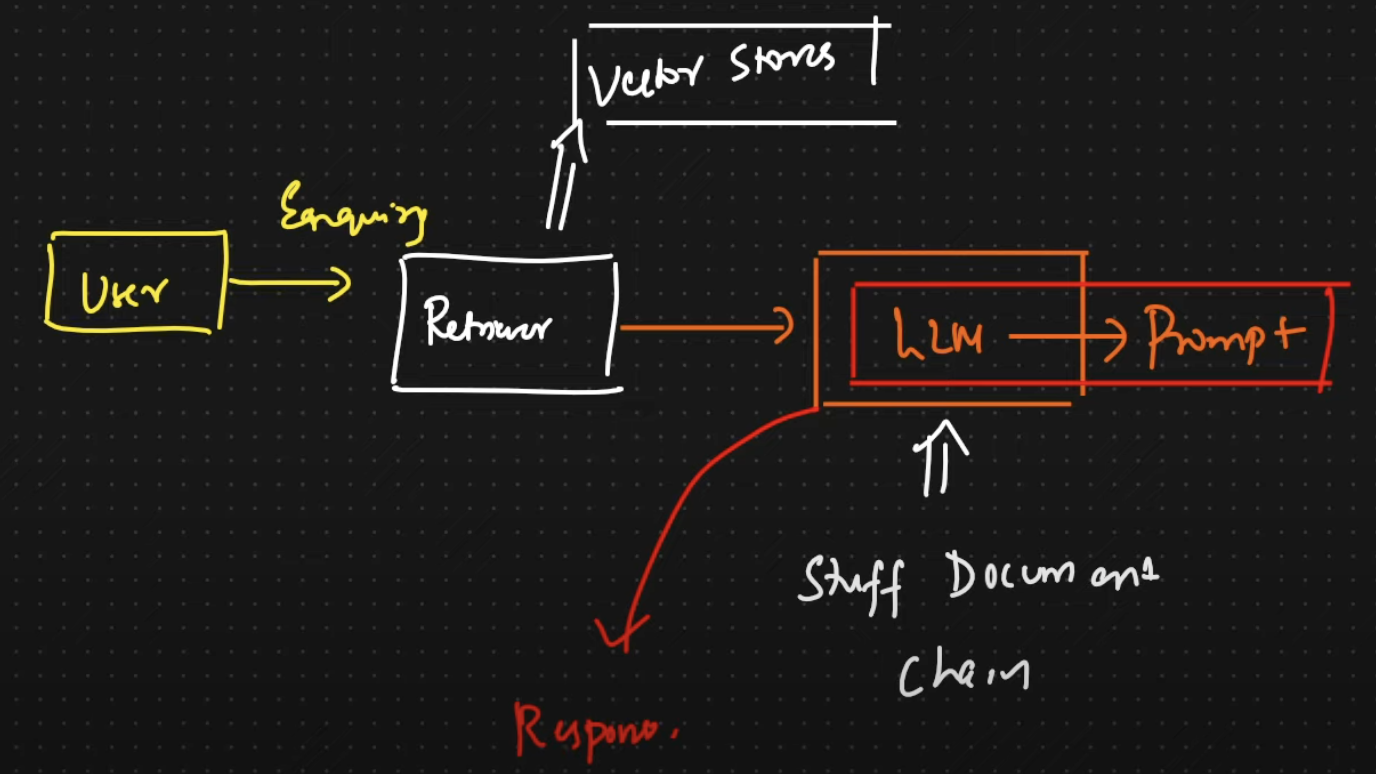



In [9]:
from langchain_community.llms import Ollama
## Load Ollama LAMA2 LLM model
llm=Ollama(model="llama2")
llm

/var/folders/3p/7pgwqkq11nj047kp5gq11lnc0000gn/T/ipykernel_3745/2277366689.py:3: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm=Ollama(model="llama2")


Ollama()

In [10]:
## Design ChatPrompt Template
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful. 
<context>
{context}
</context>
Question: {input}""")

In [11]:
## Chain Introduction
## Create Stuff Docment Chain

from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain=create_stuff_documents_chain(llm,prompt)

In [12]:
"""
Retrievers: A retriever is an interface that returns documents given
 an unstructured query. It is more general than a vector store.
 A retriever does not need to be able to store documents, only to 
 return (or retrieve) them. Vector stores can be used as the backbone
 of a retriever, but there are other types of retrievers as well. 
 https://python.langchain.com/docs/modules/data_connection/retrievers/   
"""

retriever=db.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x11a92aa30>, search_kwargs={})

In [13]:
"""
Retrieval chain:This chain takes in a user inquiry, which is then
passed to the retriever to fetch relevant documents. Those documents 
(and original inputs) are then passed to an LLM to generate a response
https://python.langchain.com/docs/modules/chains/
"""
from langchain.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [14]:
response=retrieval_chain.invoke({"input":"Scaled Dot-Product Attention"})

In [15]:
response['answer']

'The Scaled Dot-Product Attention mechanism is a type of attention used in the Transformer architecture. It is called "scaled dot-product attention" because it computes the weights for each value using a compatibility function of the query with the corresponding key, and then scales the weights by 1√dk.\n\nIn more detail, the Scaled Dot-Product Attention mechanism works as follows:\n\n1. The input consists of queries, keys, and values, where the queries, keys, and values have dimensions dk, dk, and dv, respectively.\n2. For each query, the algorithm computes the dot product of the query with all keys, divides each dot product by √dk, and applies a softmax function to obtain the weights on the values.\n3. The two most commonly used attention functions are additive attention and dot-product (multiplicative) attention. Scaled Dot-Product Attention is identical to dot-product attention except for the scaling factor of 1√dk.\n4. For small values of dk, both mechanisms perform similarly, but

In [16]:
response

{'input': 'Scaled Dot-Product Attention',
 'context': [Document(metadata={'source': 'attention.pdf', 'page': 3}, page_content='Scaled Dot-Product Attention\n Multi-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nof the values, where the weight assigned to each value is computed by a compatibility function of the\nquery with the corresponding key.\n3.2.1 Scaled Dot-Product Attention\nWe call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of\nqueries and keys of dimension dk, and values of dimension dv. We compute the dot products of the\nquery with all keys, divide each by √dk, and apply a softmax function to obtain the weights on the\nvalues.\nIn practice, we compute the attention function on a set of queries simultaneously, packed together\ninto a matrix Q. The keys and values are also packed together into matrices K and V . We compute\nthe ma